<a href="https://colab.research.google.com/github/GregoryDzej/Big-Data-Python-task/blob/main/Big_data_Cardio_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import files

uploaded = files.upload()



for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(

name=fn, length=len(uploaded[fn])))



import pandas as pd

import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

import os



# Importing dataset



main_data = pd.read_csv (r'/content/cardio_train.csv', delimiter=';', encoding = "ISO-8859-1")



main_data

Saving cardio_train.csv to cardio_train (1).csv
User uploaded file "cardio_train.csv" with length 2941524 bytes


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [53]:
main_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [54]:
#checking the number of NA's in the dataset 
main_data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [55]:
#frequency of dichotomus variable
main_data[["gender","cholesterol","gluc","smoke","alco","cardio" ]].apply(lambda x: x.value_counts()).T.stack()

gender       1    45530.0
             2    24470.0
cholesterol  1    52385.0
             2     9549.0
             3     8066.0
gluc         1    59479.0
             2     5190.0
             3     5331.0
smoke        0    63831.0
             1     6169.0
alco         0    66236.0
             1     3764.0
cardio       0    35021.0
             1    34979.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5596168c90>,
      dtype=object)

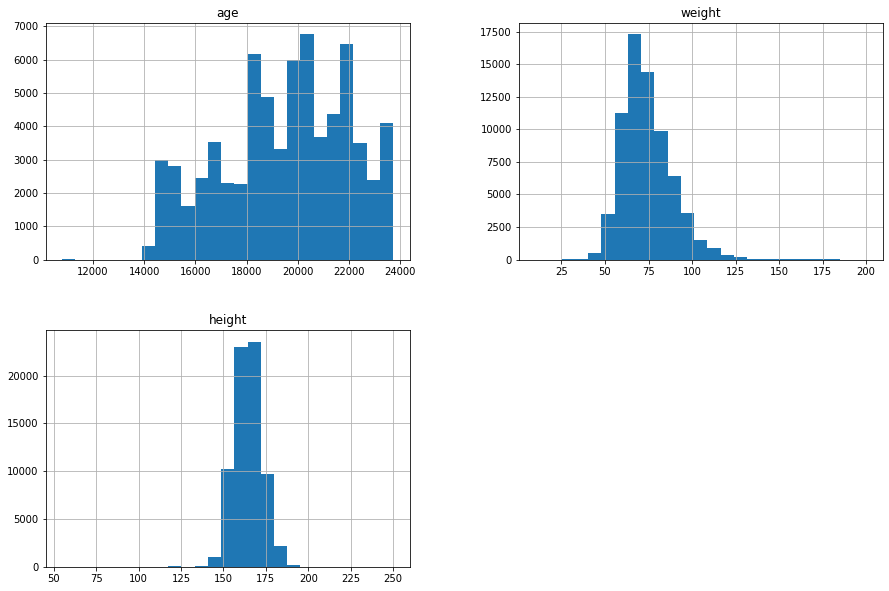

In [56]:
main_data.hist(column=['age','weight','height'], bins=25, figsize=(15, 10))

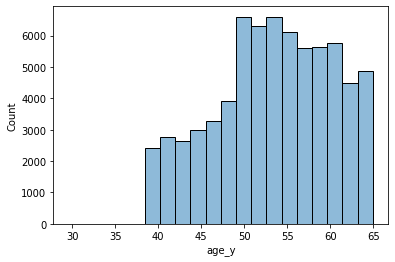

In [57]:
##########  transformation of data #######################
# convert age from days to years
main_data['age_y'] = (main_data['age']/365).round(decimals=2)
sns.histplot(data=main_data,x='age_y',bins=20,palette="dark:darkred", alpha=0.5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y,bmi,bmi_high
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60.04,29.38,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,60.58,37.73,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,61.87,29.98,0
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48.41,28.44,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,54.34,25.28,0


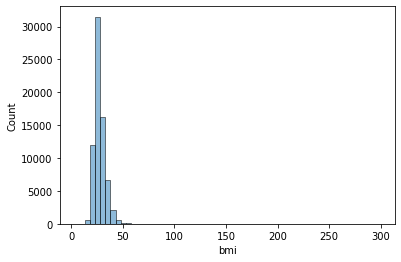

In [58]:
#convert heigh and weight to BMI categories 
main_data['bmi'] = (main_data['weight'] / (((main_data['height']/100)**2))).round(decimals=2)
#creating the treshold 0 -> 1 
main_data['bmi_high'] = (main_data['bmi'] >= 30).astype(int)
sns.histplot(data=main_data,x='bmi',bins=60,palette="dark:darkred", alpha=0.5)
main_data['bmi_high']

display(pd.DataFrame(main_data['bmi_high'].value_counts()))

main_data.head(10)

In [59]:
#converting gender from 1 and 2 to 0 and 1 value 
main_data['gender_dummy'] = main_data['gender'] - 1
main_data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y,bmi,bmi_high,gender_dummy
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60.04,29.38,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,60.58,37.73,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,61.87,29.98,0,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48.41,28.44,0,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,54.34,25.28,0,0


In [60]:
############## DATA CLEANING ###################
# deleting the BMI that are bigger than 120

main_data["bmi"].describe().T
drop_criteria_bmi = main_data[main_data['bmi'] > 120].index

# number of records to be removed
print(drop_criteria_bmi.size)
# remove records
main_data.drop(drop_criteria_bmi, inplace = True)

27


In [61]:
#adjust the Blood pressure levels 
# ap_hi is higher than 250 or lower than 60
drop_criteria_aphi = main_data[(main_data['ap_hi'] > 210) | (main_data['ap_hi'] < 60)].index

# ap_lo is higher than 200 or lower than 10
drop_criteria_aplo = main_data[(main_data['ap_lo'] > 140) | (main_data['ap_lo'] < 30)].index

# ap_lo is higher than 'ap_hi
drop_criteria_ap = main_data[main_data['ap_lo'] > main_data['ap_hi']].index 

# number of records to be removed
drop_criteria = drop_criteria_aphi.union(drop_criteria_aplo)
drop_criteria.union(drop_criteria_ap)
print(drop_criteria.size)
1276
# remove the records
main_data.drop(drop_criteria, inplace = True)

1274


In [62]:
display(main_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,68699.0,49969.859940,28846.891902,0.00,24993.50,50008.00,74868.50,99999.00
age,68699.0,19464.045532,2468.186192,10798.00,17657.00,19701.00,21324.00,23713.00
gender,68699.0,1.348695,0.476561,1.00,1.00,1.00,2.00,2.00
height,68699.0,164.393863,7.996745,76.00,159.00,165.00,170.00,250.00
weight,68699.0,74.107002,14.296139,11.00,65.00,72.00,82.00,200.00
ap_hi,68699.0,126.571275,16.619176,60.00,120.00,120.00,140.00,210.00
ap_lo,68699.0,81.327603,9.509558,30.00,80.00,80.00,90.00,140.00
cholesterol,68699.0,1.364445,0.678762,1.00,1.00,1.00,1.00,3.00
gluc,68699.0,1.225840,0.571799,1.00,1.00,1.00,1.00,3.00
smoke,68699.0,0.088022,0.283328,0.00,0.00,0.00,0.00,1.00


In [63]:
# distribution of response variable
display(pd.DataFrame(main_data['cardio'].value_counts()))

,cardio
0,34716
1,33983


<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

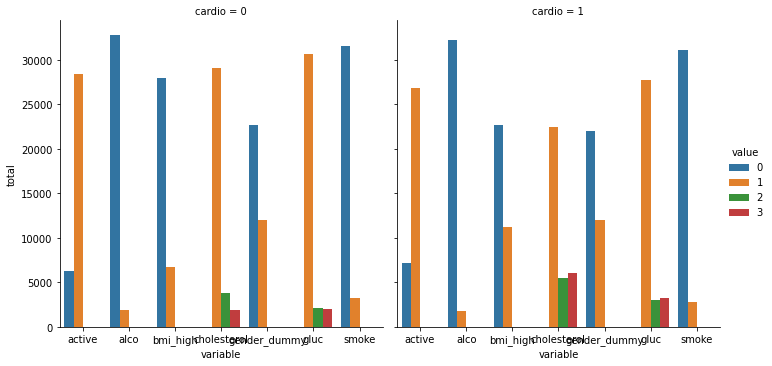

In [87]:
######################## DATA VISUALISATION #########

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` 
    #using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', ;gender_dummy' and 'bmi_high'.
    data_cat = pd.melt(main_data,value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'gender_dummy','bmi_high'],
                       id_vars=['cardio'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
    #You will have to rename one of the columns for the catplot to work correctly.
    data_cat = pd.DataFrame(data_cat.groupby(['variable', 'value', 'cardio'])['value']
                          .count()).rename(columns={'value': 'total'}).reset_index()    

    # Draw the catplot with 'sns.catplot()'
    fig = plt.figure(figsize=(20,30))
    sns.catplot(data = data_cat, x='variable', y='total', hue='value', col='cardio', kind="bar")

    # saving the png image
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f558bd73610>,
      dtype=object)

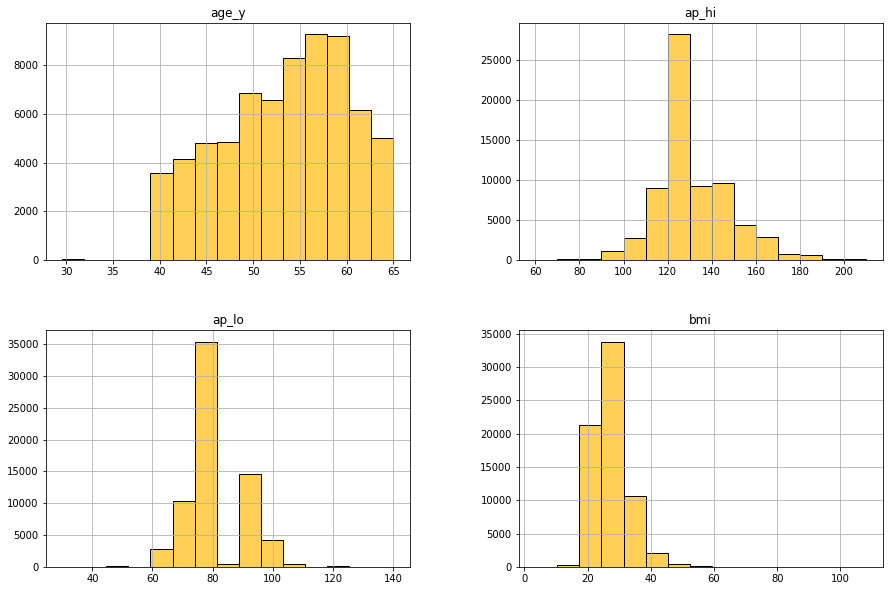

In [88]:
main_data.hist(column=['age_y','ap_hi','ap_lo','bmi'], bins=15, figsize=(15, 10), color='#FFCF56', edgecolor='black')